In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
import numpy as np
import torch

from p3droslo.loss  import Loss
from p3droslo.model import TensorModel, SphericallySymmetric

from test_1D                          import get_model, get_obs, forward, forward_N_lines, frequencies, velocities, r_in, r_out, v_fac, analytic_velo, analytic_T
from test_1D_CO_and_T_and_vel_N_lines import get_initial_model, reconstruct_N_lines, fit_N_lines

/home/frederikd/.local/lib/python3.9/site-packages/astroquery/lamda/core.py:145: UserWarning: The first time a LAMDA function is called, it must assemble a list of valid molecules and URLs.  This list will be cached so future operations will be faster.
  warnings.warn("The first time a LAMDA function is called, it must "


You have selected line:
    CO(J=3-2)
Please check the properties that were inferred:
    Frequency         3.457959899e+11  Hz
    Einstein A coeff  2.497000000e-06  1/s
    Molar mass        28.0101          g/mol
You have selected line:
    CO(J=4-3)
Please check the properties that were inferred:
    Frequency         4.610407682e+11  Hz
    Einstein A coeff  6.126000000e-06  1/s
    Molar mass        28.0101          g/mol
You have selected line:
    CO(J=5-4)
Please check the properties that were inferred:
    Frequency         5.762679305e+11  Hz
    Einstein A coeff  1.221000000e-05  1/s
    Molar mass        28.0101          g/mol


In [ ]:
from p3droslo.lines import Line
from astropy import constants

In [3]:
# Line data
lines = [Line('CO', i) for i in range(10)]

# Frequency data
vdiff = 300   # velocity increment size [m/s]
nfreq = 100   # number of frequencies

velocities  = nfreq * vdiff * torch.linspace(-1, +1, nfreq)
frequencies = [(1.0 + velocities / constants.c.si.value) * line.frequency for line in lines]

You have selected line:
    CO(J=1-0)
Please check the properties that were inferred:
    Frequency         1.152712018e+11  Hz
    Einstein A coeff  7.203000000e-08  1/s
    Molar mass        28.0101          g/mol
You have selected line:
    CO(J=2-1)
Please check the properties that were inferred:
    Frequency         2.305380000e+11  Hz
    Einstein A coeff  6.910000000e-07  1/s
    Molar mass        28.0101          g/mol
You have selected line:
    CO(J=3-2)
Please check the properties that were inferred:
    Frequency         3.457959899e+11  Hz
    Einstein A coeff  2.497000000e-06  1/s
    Molar mass        28.0101          g/mol
You have selected line:
    CO(J=4-3)
Please check the properties that were inferred:
    Frequency         4.610407682e+11  Hz
    Einstein A coeff  6.126000000e-06  1/s
    Molar mass        28.0101          g/mol
You have selected line:
    CO(J=5-4)
Please check the properties that were inferred:
    Frequency         5.762679305e+11  Hz
    Eins

In [66]:
rs = np.logspace(np.log10(r_in), np.log10(r_out), 10)    

In [70]:
def image_ray_tracer_spherical_symmetry(rs):

    dZss = []
    idss = []

    for i in range(len(rs)-1):

        Zs  = np.sqrt(rs[i:]**2 - rs[i]**2)
        dZs = np.diff(Zs)
        ids = np.arange(i+1, len(rs))

        dZss.append(np.concatenate((dZs[::-1],      dZs)))
        idss.append(np.concatenate((ids[::-1], [i], ids)))

    return idss, dZss

In [71]:
ids, dZs = image_ray_tracer_spherical_symmetry(rs)

In [72]:
ids

[array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([9, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([9, 8, 7, 6, 5, 4, 3, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([9, 8, 7, 6, 5, 4, 3, 4, 5, 6, 7, 8, 9]),
 array([9, 8, 7, 6, 5, 4, 5, 6, 7, 8, 9]),
 array([9, 8, 7, 6, 5, 6, 7, 8, 9]),
 array([9, 8, 7, 6, 7, 8, 9]),
 array([9, 8, 7, 8, 9]),
 array([9, 8, 9])]

In [75]:
dZs

[array([1.07971375e+15, 3.00436764e+14, 8.35983166e+13, 2.32617365e+13,
        6.47274622e+12, 1.80118741e+12, 5.01577570e+11, 1.40993633e+11,
        5.16394355e+10, 5.16394355e+10, 1.40993633e+11, 5.01577570e+11,
        1.80118741e+12, 6.47274622e+12, 2.32617365e+13, 8.35983166e+13,
        3.00436764e+14, 1.07971375e+15]),
 array([1.07971375e+15, 3.00436772e+14, 8.35983464e+13, 2.32618438e+13,
        6.47313191e+12, 1.80257632e+12, 5.06704844e+11, 1.85582509e+11,
        1.85582509e+11, 5.06704844e+11, 1.80257632e+12, 6.47313191e+12,
        2.32618438e+13, 8.35983464e+13, 3.00436772e+14, 1.07971375e+15]),
 array([1.07971378e+15, 3.00436880e+14, 8.35987321e+13, 2.32632299e+13,
        6.47812342e+12, 1.82100279e+12, 6.66948957e+11, 6.66948957e+11,
        1.82100279e+12, 6.47812342e+12, 2.32632299e+13, 8.35987321e+13,
        3.00436880e+14, 1.07971378e+15]),
 array([1.07971416e+15, 3.00438266e+14, 8.36037135e+13, 2.32811685e+13,
        6.54434471e+12, 2.39689027e+12, 2.39689027

In [ ]:

def analytic_velo(r, v_in, v_inf, beta):
    return v_in + (v_inf - v_in) * (1.0 - r_in / r)**beta

def analytic_T(r, T_in, epsilon):
    return T_in * (r_in / r)**epsilon

In [ ]:
def forward_analytic_velo_and_T_N_lines(spherical, lines, frequencies):

    r = spherical.model_2D.get_radius(origin=spherical.origin_2D)
    r[r<r_in] = r_in

    velocity = analytic_velo(
        r     = torch.from_numpy(r),
        v_in  = torch.exp(spherical.model_1D['log_v_in']),
        v_inf = torch.exp(spherical.model_1D['log_v_inf']),
        beta  = torch.exp(spherical.model_1D['log_beta'])
    )
    
    temperature = analytic_T(
        r       = torch.from_numpy(r),
        T_in    = torch.exp(spherical.model_1D['log_T_in']),
        epsilon = torch.exp(spherical.model_1D['log_epsilon'])
    )

    spherical.map_1D_to_2D()

    # Extract the projection cosine along the line of sight
    direction = spherical.model_2D.get_radial_direction(origin=spherical.origin_2D)[0]
    direction = direction.nan_to_num()
    
    imgs = [
             line.LTE_image_along_last_axis(
                 density      = torch.exp(spherical.model_2D['log_CO'          ].T),
                 temperature  = temperature.T,
                 v_turbulence = torch.exp(spherical.model_2D['log_v_turbulence'].T),
                 velocity_los = velocity.T * direction.T,
                 frequencies  = freq,
                 dx           = spherical.model_2D.dx(0)
              )
              for (line, freq) in zip(lines, frequencies)
            ]
    
    # Compute the integrated line intensity
    Is = [spherical.integrate_intensity(img) for img in imgs]
    
    return Is

In [61]:
maxes = []
for dz in dZs:
    maxes.append(dZ.max())

In [64]:
max(maxes)

164235894547423.5

In [4]:
test_model_name = 'models/test_model_1D.h5'
spherical_model = get_model()
spherical_model.model_1D.save(test_model_name)

In [5]:
obss = forward_N_lines(spherical_model, lines, frequencies)

In [6]:
lines[0].LTE_pops(torch.Tensor(100))

tensor([[       nan, 8.6381e-01,        nan,  ...,        nan, 0.0000e+00,
                nan],
        [       nan, 1.3557e-01,        nan,  ...,        nan,        nan,
                nan],
        [       nan, 6.1847e-04,        nan,  ...,        nan,        nan,
                nan],
        ...,
        [       nan, 0.0000e+00,        nan,  ...,        nan,        nan,
                nan],
        [       nan, 0.0000e+00,        nan,  ...,        nan,        nan,
                nan],
        [       nan, 0.0000e+00,        nan,  ...,        nan,        nan,
                nan]], dtype=torch.float64)

(0.0, 1.0)

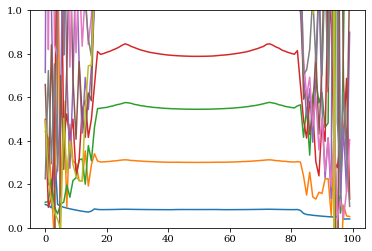

In [7]:
for i in range(len(obss)-1):
    plt.plot((obss[i] / obss[i+1]).data)

# plt.yscale('log')
# plt.xlim((20,80))
plt.ylim((0, 1))

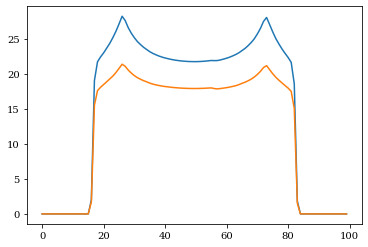

In [8]:
plt.plot(obss[5])
plt.plot(obss[6])

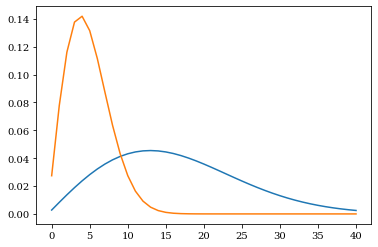

In [16]:
plt.plot(lines[0].LTE_pops(torch.Tensor([1000.0])).data)
plt.plot(lines[0].LTE_pops(torch.Tensor([100.0])).data)

In [9]:
nCO_init = 25
v_in  = 1.0e+3
v_inf = 2.0e+4
beta  = 0.9
tmp_init = 1.0e+3
epsilon  = 0.85
spherical = get_initial_model(
    from_model = test_model_name,
    nCO        = nCO_init,
    v_in       = v_in,
    v_inf      = v_inf,
    beta       = beta,
    tmp        = tmp_init,
    epsilon    = epsilon
)

In [7]:
spherical.model_1D.info()

Variable key:              Free/Fixed:   Field:    Min:           Mean:          Max:
  log_CO                     Free          True     +3.219e+00     +3.219e+00     +3.219e+00
  log_temperature            Fixed         True     +7.138e+00     +7.438e+00     +8.517e+00
  log_v_turbulence           Fixed         True     +5.521e+00     +5.521e+00     +5.521e+00
  log_velocity               Fixed         True     +9.210e+00     +1.214e+01     +1.220e+01
  log_v_in                   Free          False    +6.908e+00     +6.908e+00     +6.908e+00
  log_v_inf                  Free          False    +9.903e+00     +9.903e+00     +9.903e+00
  log_beta                   Free          False    -1.054e-01     -1.054e-01     -1.054e-01
  log_T_in                   Free          False    +6.908e+00     +6.908e+00     +6.908e+00
  log_epsilon                Free          False    -1.625e-01     -1.625e-01     -1.625e-01
sizes: [1.49597871e+15]
shape: (128,)


In [8]:
Is = forward_N_lines(spherical, lines, frequencies)

Text(0.5, 0, 'frequency [km/s]')

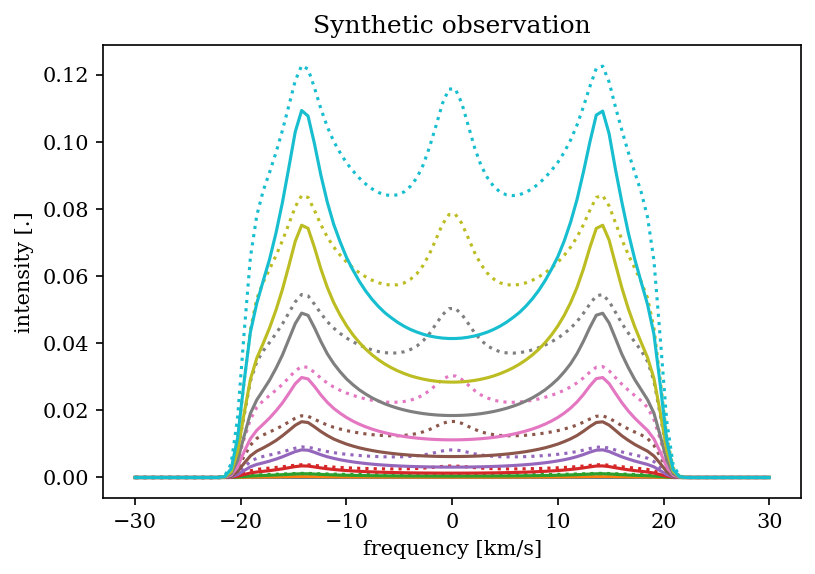

In [9]:
plt.figure(dpi=150)
plt.title("Synthetic observation")
for obs in obss[:]:
    plt.plot(velocities/1.0e+3, obs.data, linestyle=':')
for I in Is[:]:
    plt.plot(velocities/1.0e+3, I.data)
plt.ylabel(r"intensity [.]")
plt.xlabel(r"frequency [km/s]")
# plt.yscale('log')
# plt.ylim([1.0e-10, 10.0])

log_v_in             6.907755278982137
log_v_inf            9.903487552536127
log_beta             -0.10536051565782628
log_T_in             6.907755278982137
log_epsilon          -0.16251892949777494


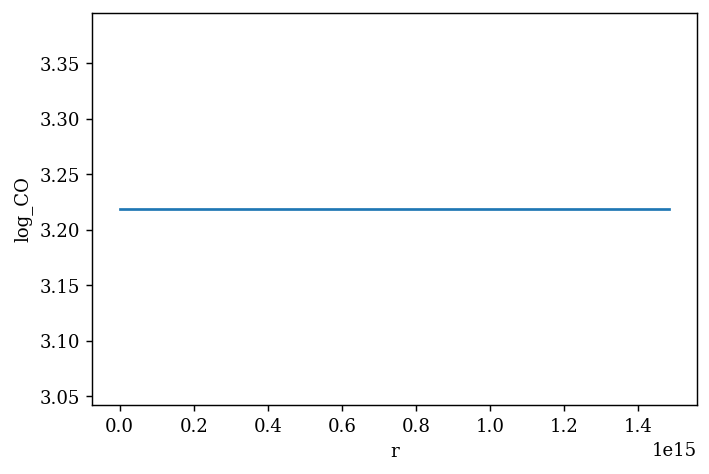

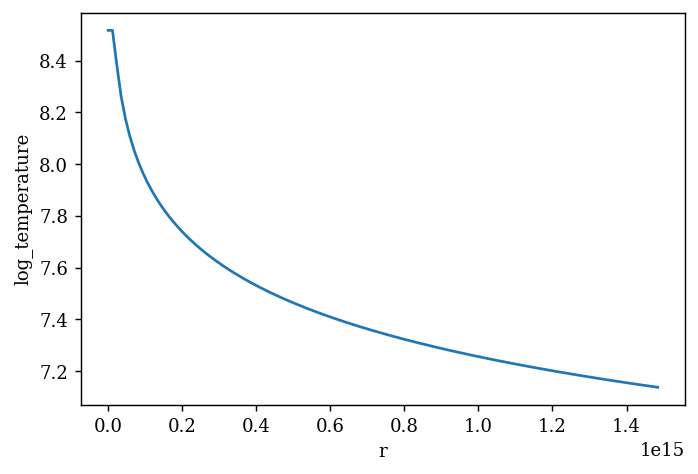

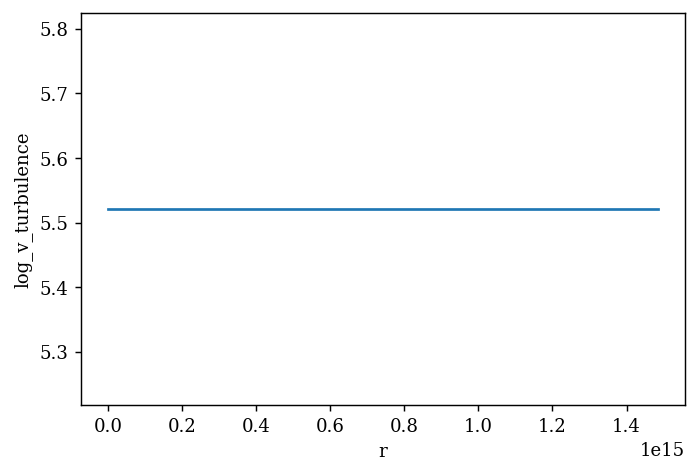

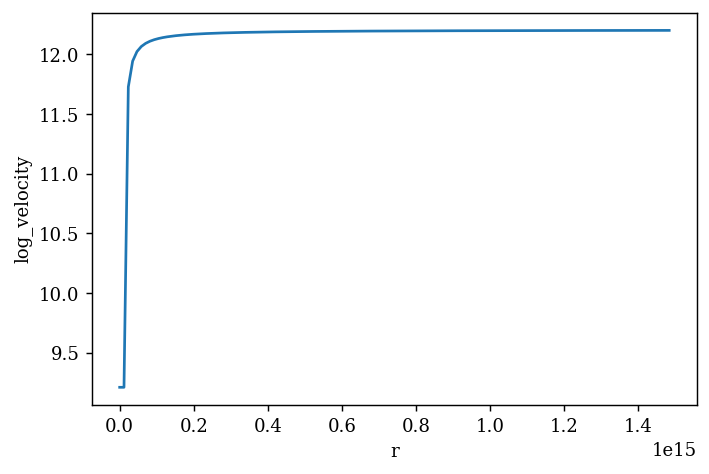

In [10]:
spherical.plot()

In [11]:
# # loss_keys  = [f'rep_{i}' for i in range(len(obss))]
# loss_keys  = ['rep']
# loss_keys += ['reg', 'cnt']
# loss = Loss(loss_keys)


losses = [Loss(['rep', 'reg', 'cnt']) for i in range(len(obss))]

In [12]:
imgs, loss = fit_N_lines(losses, spherical, lines, frequencies, obss, N_epochs=3  , lr=1.0e-1, w_rep=1.0e+0, w_reg=1.0e-0, w_cnt=1.0e+0)

for loss in losses:
    loss.renormalise_all()
    loss.reset()

  0%|          | 0/3 [00:00<?, ?it/s]/home/frederikd/.local/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 3/3 [00:19<00:00,  6.49s/it]


In [13]:
imgs, losses = fit_N_lines(losses, spherical, lines, frequencies, obss, N_epochs=10, lr=1.0e-1, w_rep=1.0e+0, w_reg=1.0e-1, w_cnt=1.0e+0) 

100%|██████████| 10/10 [01:01<00:00,  6.19s/it]


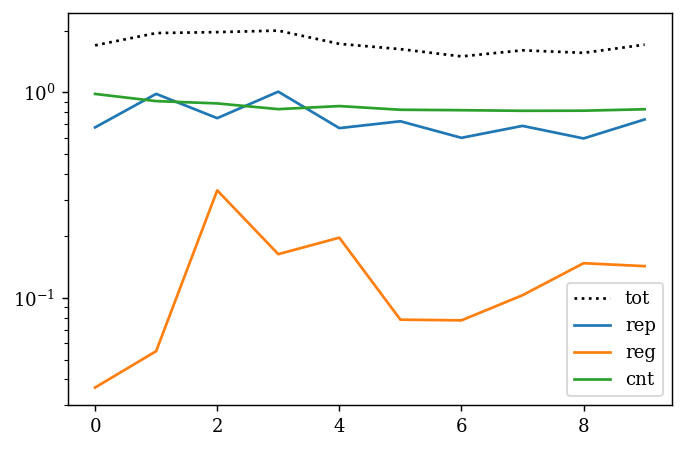

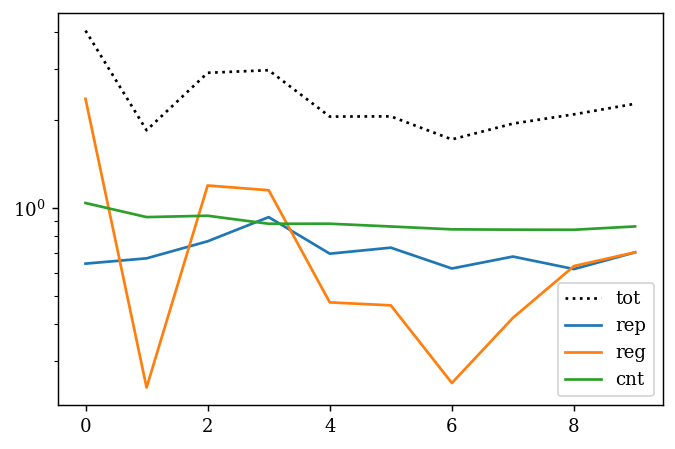

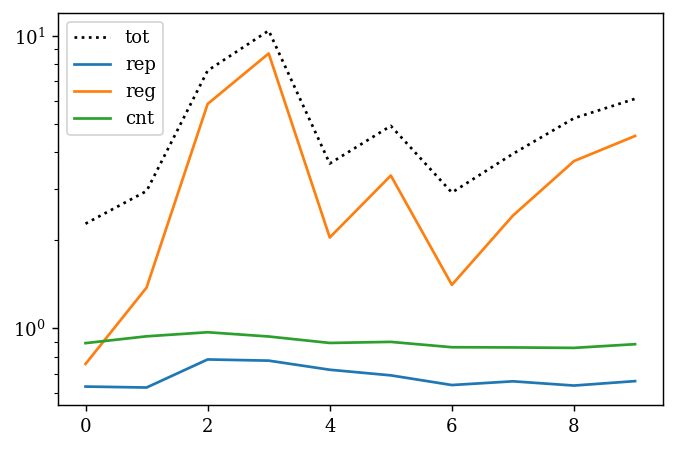

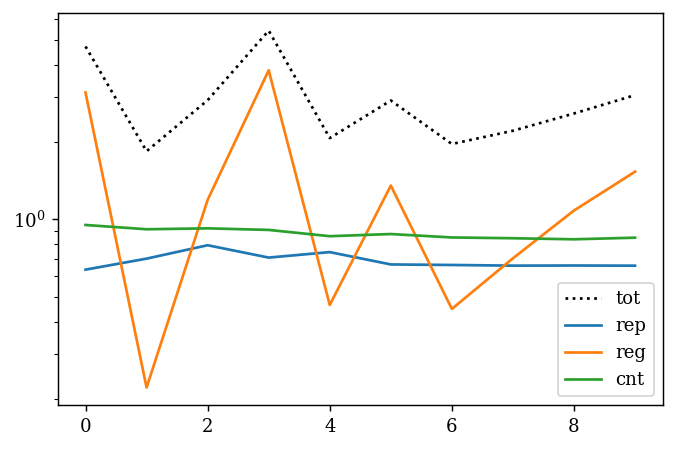

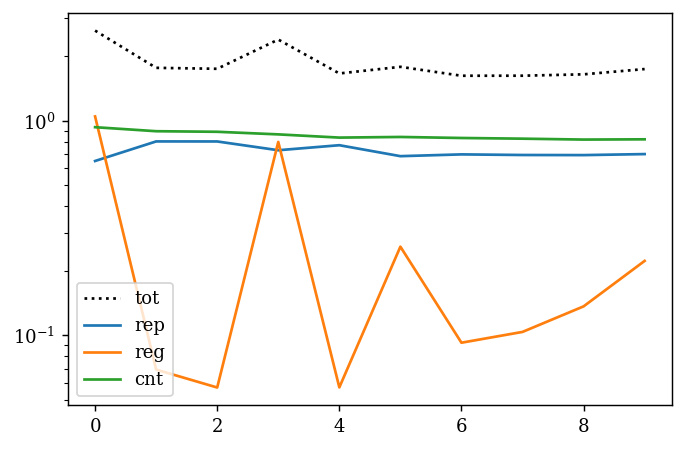

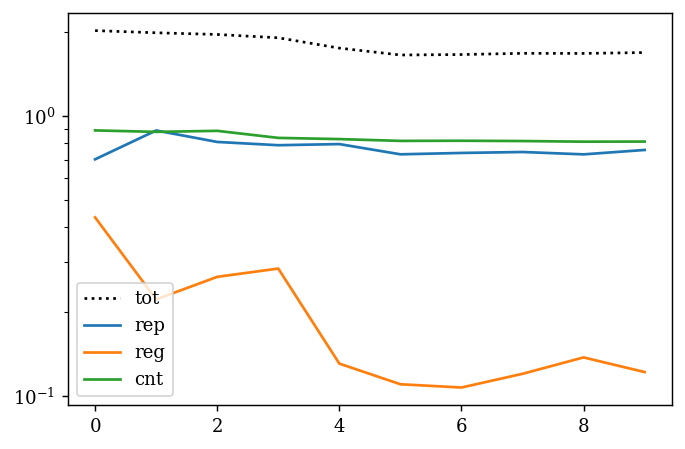

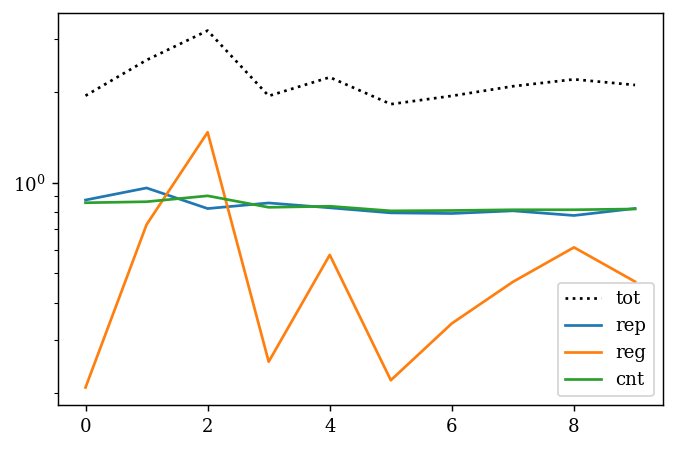

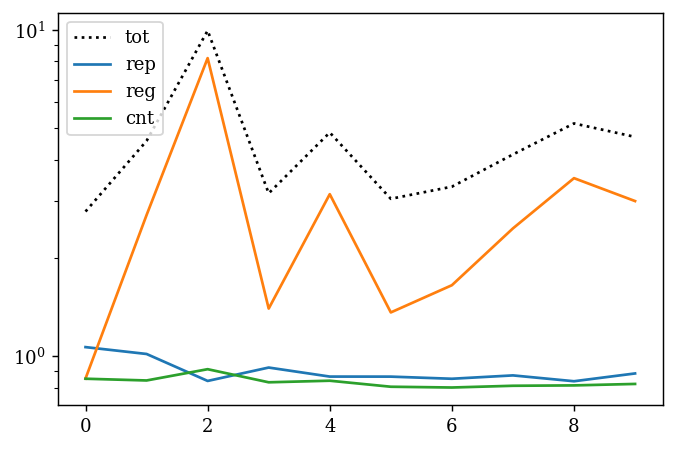

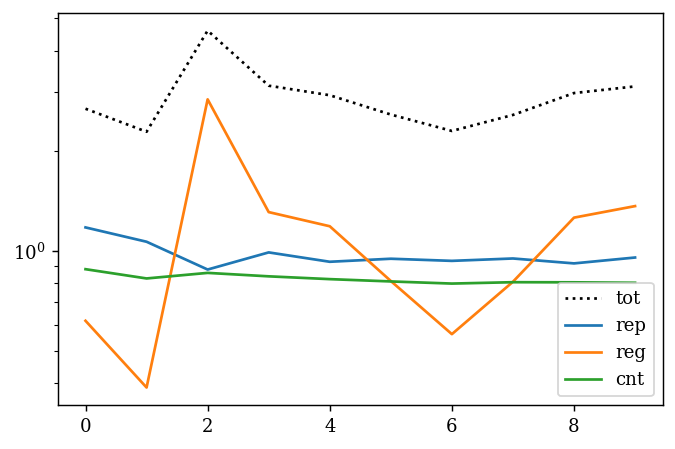

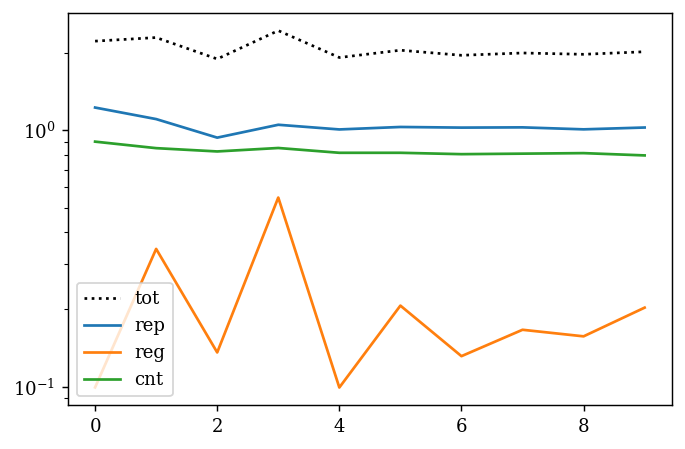

In [14]:
for loss in losses:
    loss.plot()

In [15]:
imgs, losses = fit_N_lines(losses, spherical, lines, frequencies, obss, N_epochs=100, lr=1.0e-1, w_rep=1.0e+0, w_reg=1.0e-1, w_cnt=1.0e+0) 

100%|██████████| 100/100 [10:28<00:00,  6.29s/it]


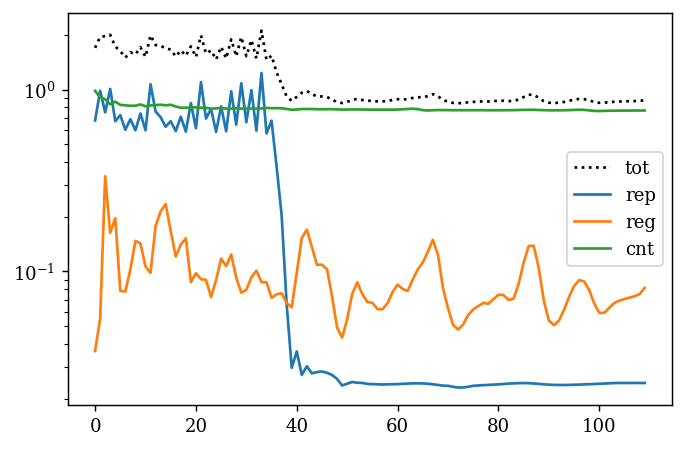

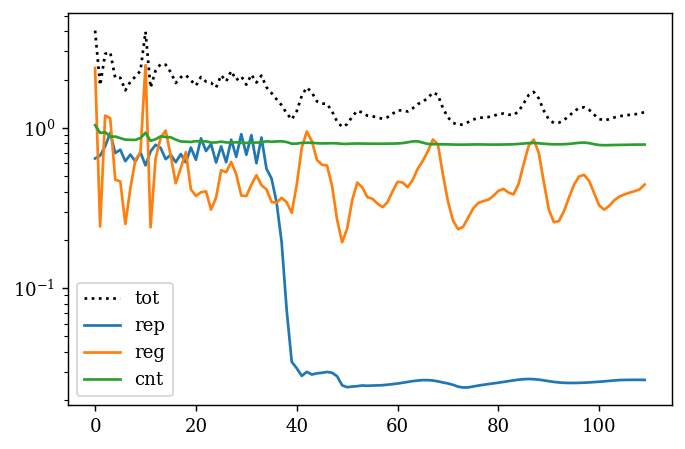

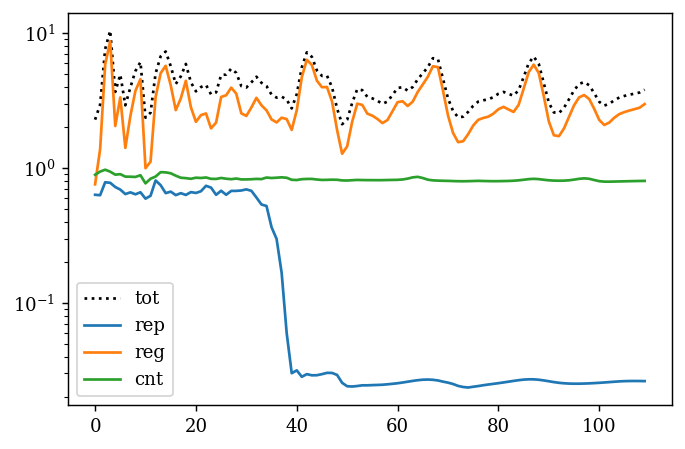

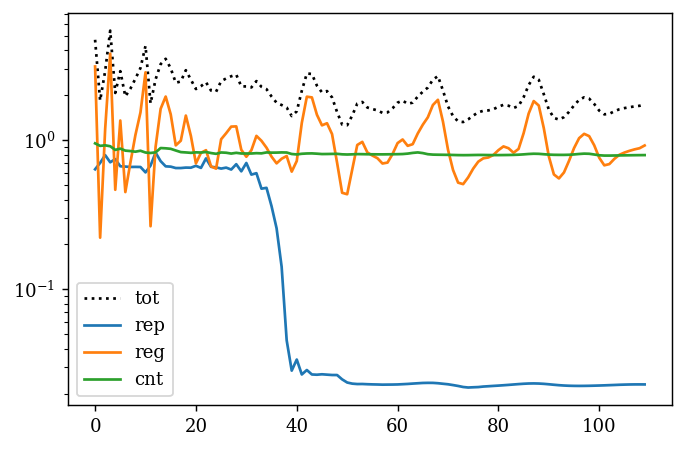

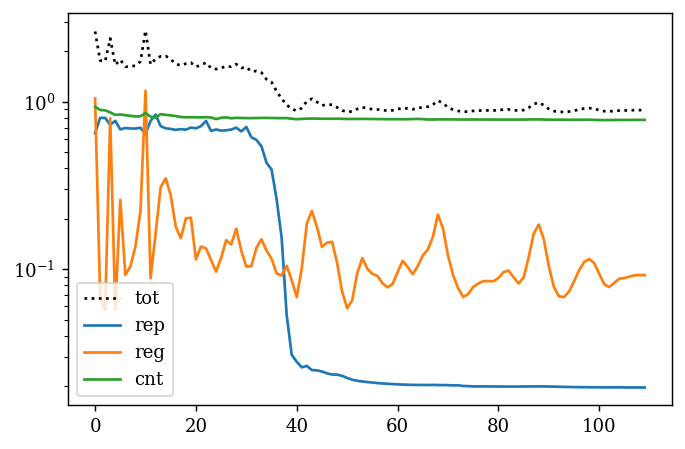

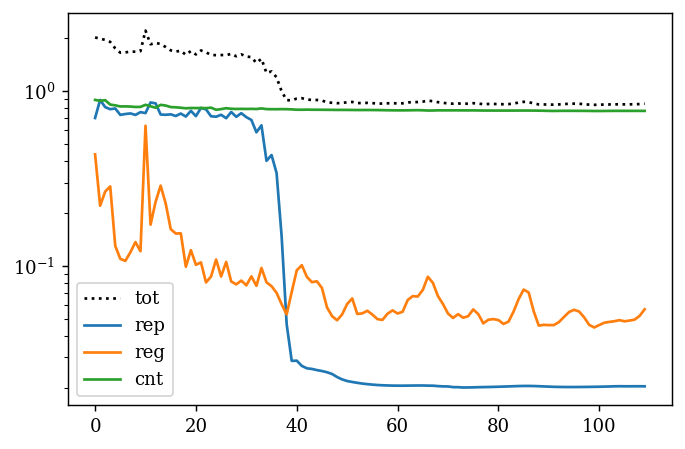

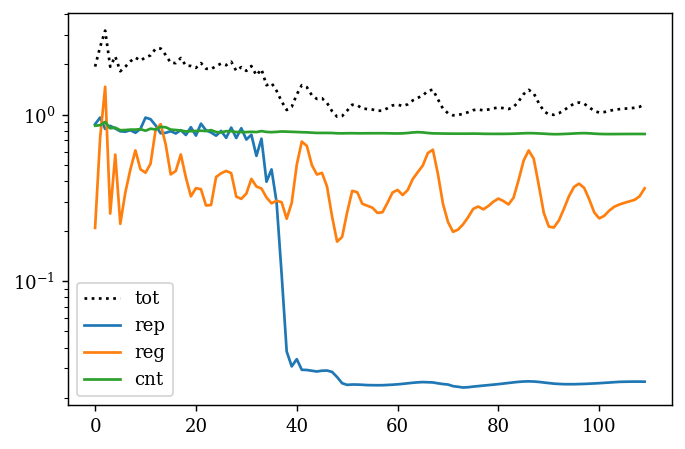

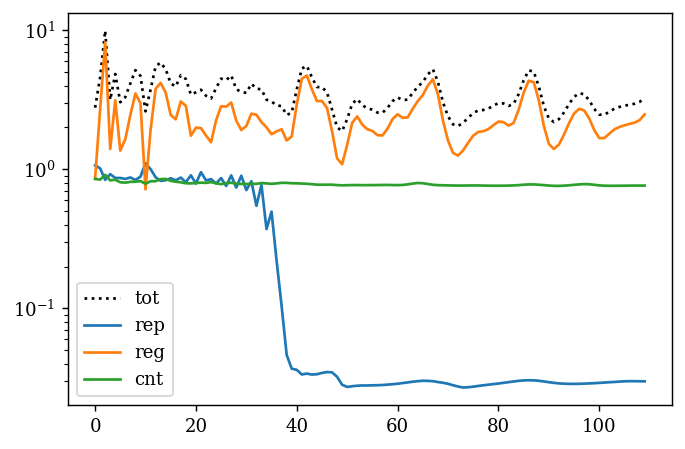

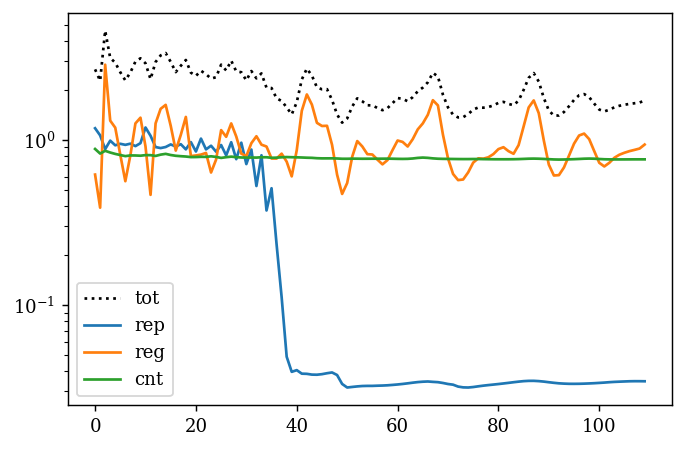

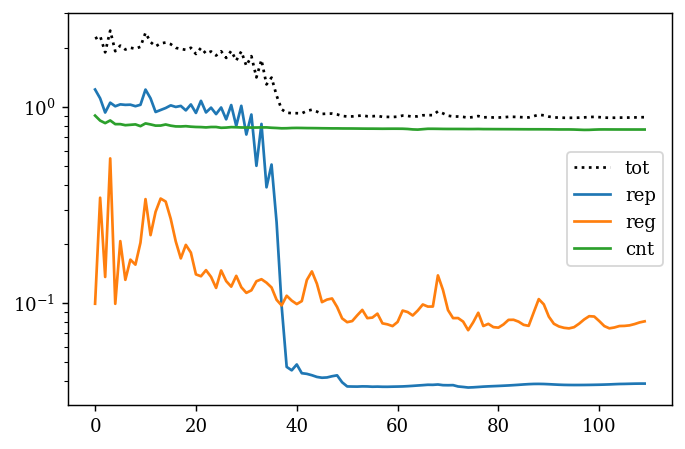

In [16]:
for loss in losses:
    loss.plot()

In [21]:
imgs, losses = fit_N_lines(losses, spherical, lines, frequencies, obss, N_epochs=100, lr=1.0e-1, w_rep=1.0e+2, w_reg=1.0e-1, w_cnt=1.0e+0) 

100%|██████████| 100/100 [09:49<00:00,  5.89s/it]


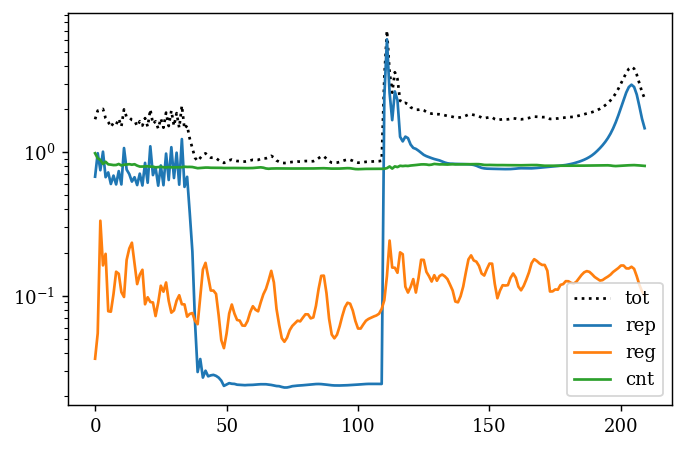

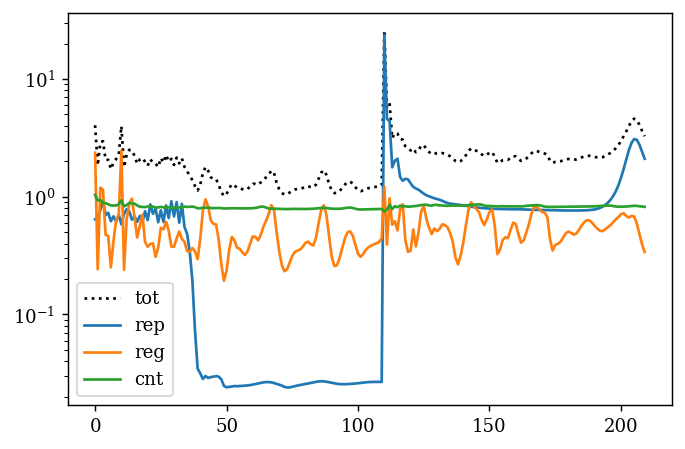

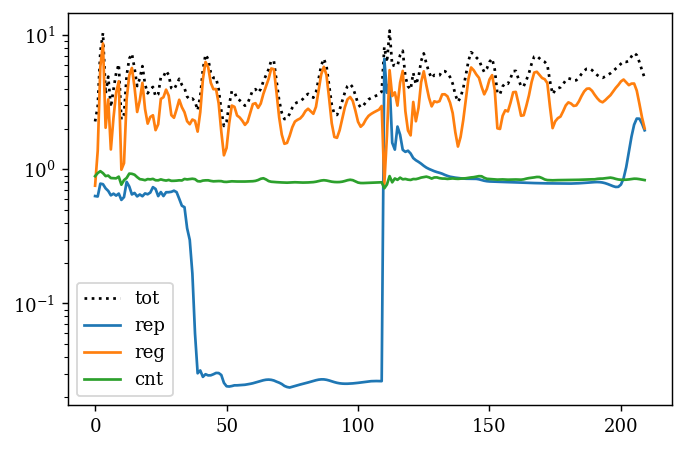

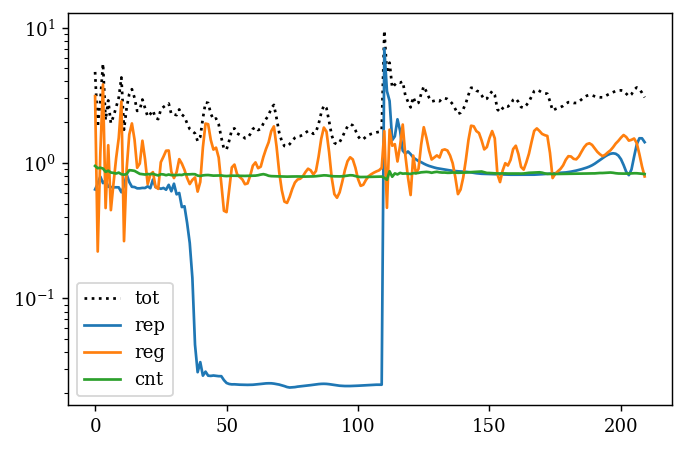

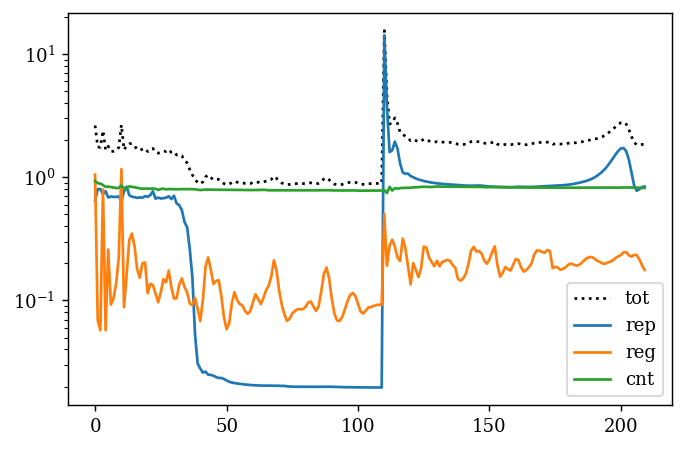

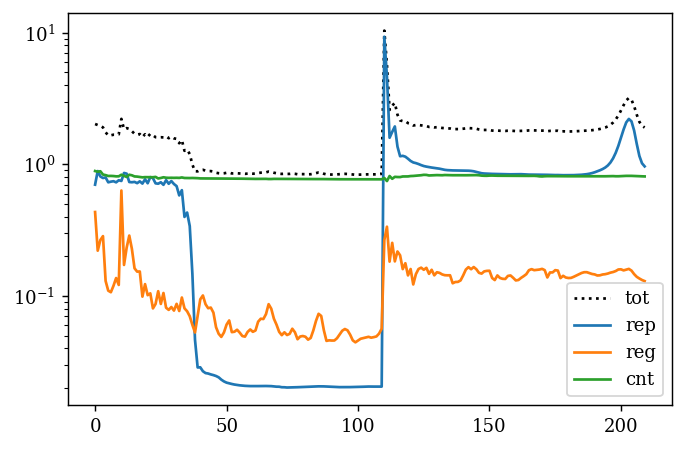

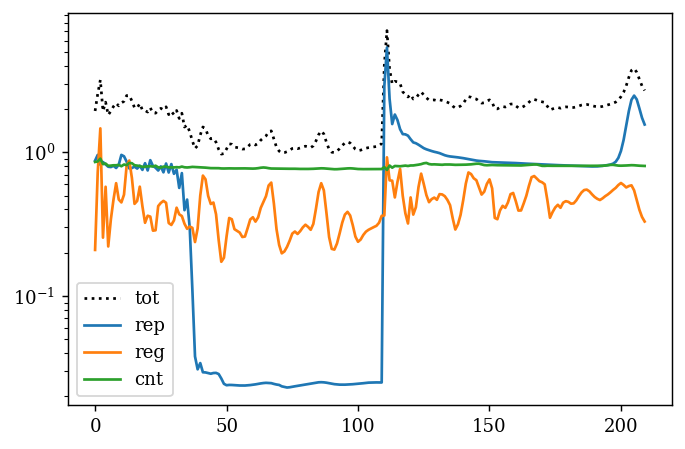

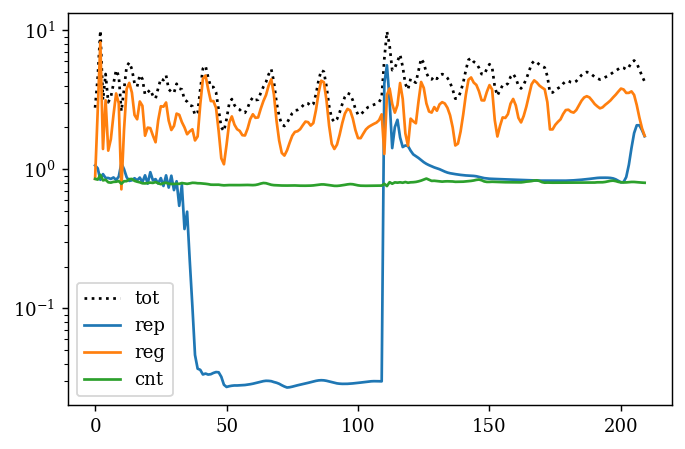

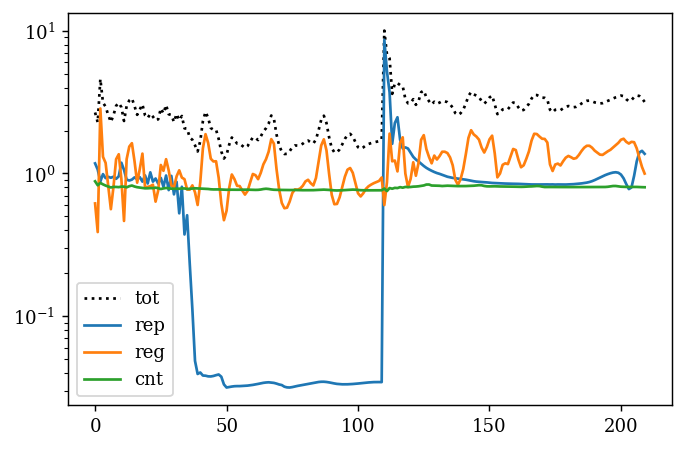

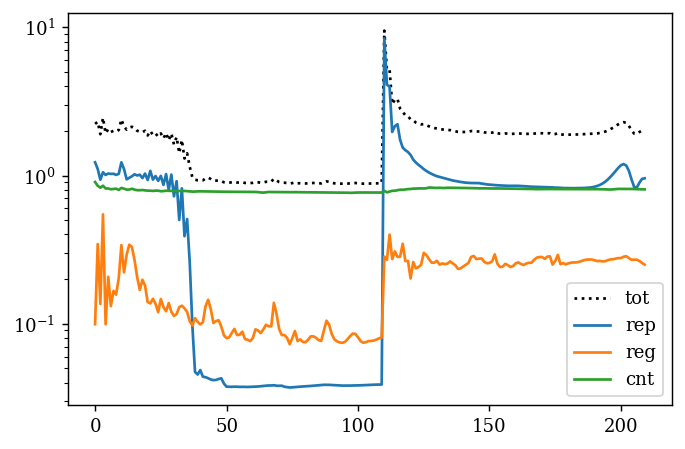

In [22]:
for loss in losses:
    loss.plot()

In [ ]:
imgs, loss = fit_N_lines(loss, spherical, lines, frequencies, obss, N_epochs=250, lr=1.0e-1, w_rep=1.0e+0, w_reg=1.0e-1, w_cnt=1.0e+0) 

100%|██████████| 250/250 [20:55<00:00,  5.02s/it]


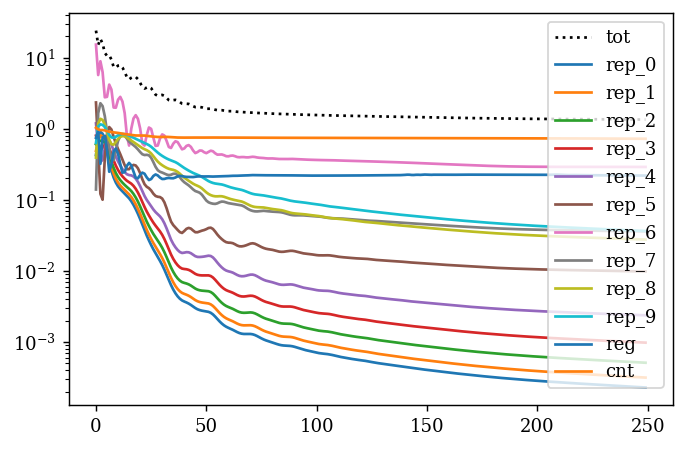

In [14]:
loss.plot()

In [16]:
imgs, loss = fit_N_lines(loss, spherical, lines, frequencies, obss, N_epochs=250, lr=1.0e-1, w_rep=1.0e+2, w_reg=1.0e+0, w_cnt=1.0e+1)

100%|██████████| 250/250 [20:50<00:00,  5.00s/it]


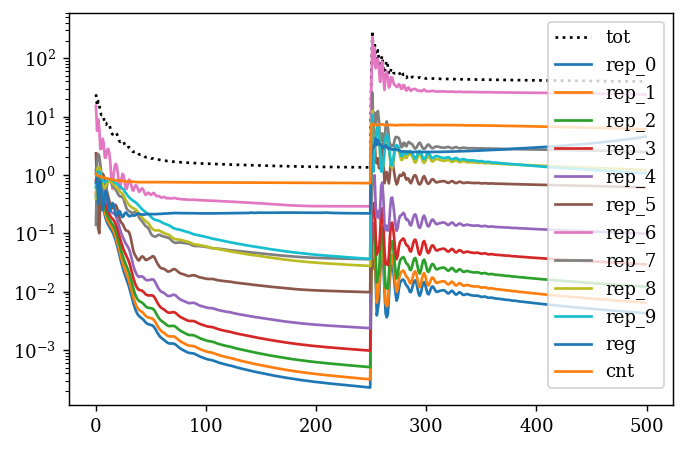

In [17]:
loss.plot()

In [22]:
imgs, loss = fit_N_lines(loss, spherical, lines, frequencies, obss, N_epochs=250, lr=1.0e-1, w_rep=1.0e+3, w_reg=1.0e+0, w_cnt=5.0e+1)

100%|██████████| 250/250 [21:28<00:00,  5.15s/it]


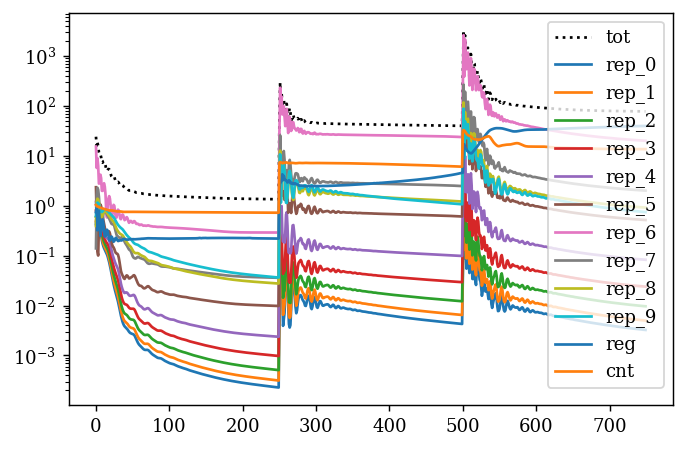

In [24]:
loss.plot()

In [30]:
imgs, loss = fit_N_lines(loss, spherical, lines, frequencies, obss, N_epochs=250, lr=1.0e-1, w_rep=1.0e+5, w_reg=1.0e+0, w_cnt=5.0e+1)

100%|██████████| 250/250 [20:52<00:00,  5.01s/it]


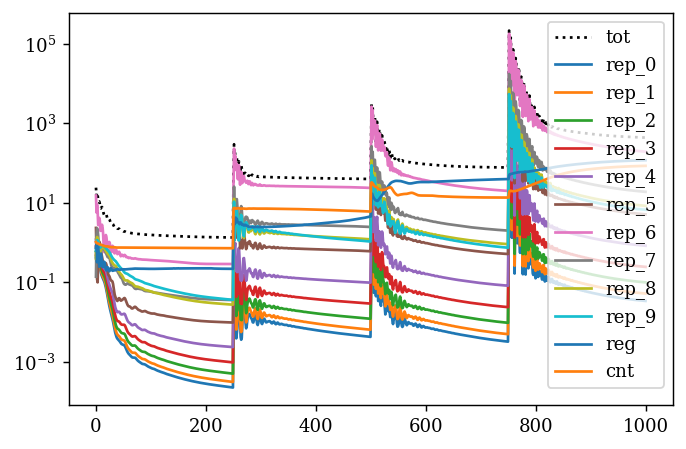

In [31]:
loss.plot()

In [23]:
Is = forward_N_lines(spherical, lines, frequencies)

Text(0.5, 0, 'frequency [km/s]')

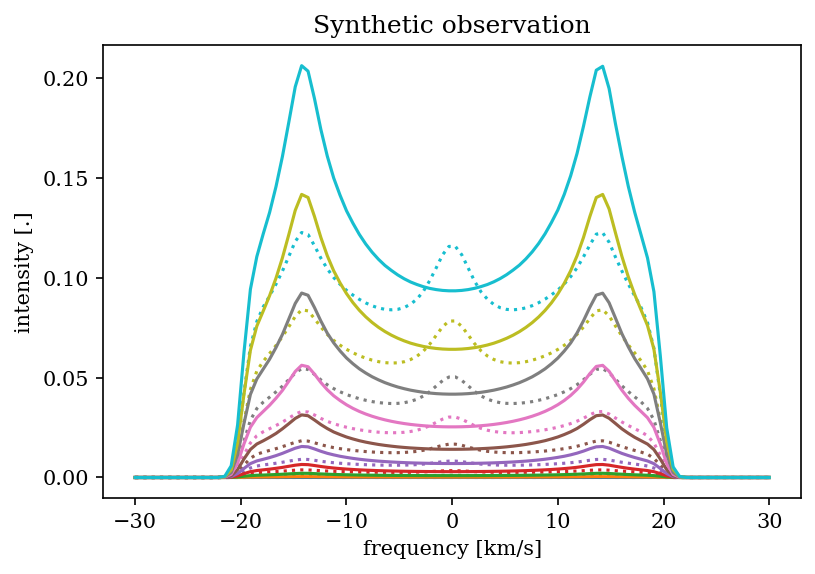

In [24]:
plt.figure(dpi=150)
plt.title("Synthetic observation")
for obs in obss[:]:
    plt.plot(velocities/1.0e+3, obs.data, linestyle=':')
for I in Is[:]:
    plt.plot(velocities/1.0e+3, I.data)
plt.ylabel(r"intensity [.]")
plt.xlabel(r"frequency [km/s]")
# plt.yscale('log')
# plt.ylim([1.0e-10, 10.0])

In [19]:
spherical.model_1D.info()

Variable key:              Free/Fixed:   Field:    Min:           Mean:          Max:
  log_CO                     Free          True     +3.164e+00     +3.308e+00     +4.130e+00
  log_temperature            Fixed         True     +7.138e+00     +7.438e+00     +8.517e+00
  log_v_turbulence           Fixed         True     +5.521e+00     +5.521e+00     +5.521e+00
  log_velocity               Fixed         True     +9.210e+00     +1.214e+01     +1.220e+01
  log_v_in                   Free          False    +5.672e+00     +5.672e+00     +5.672e+00
  log_v_inf                  Free          False    +1.066e+01     +1.066e+01     +1.066e+01
  log_beta                   Free          False    +4.313e+00     +4.313e+00     +4.313e+00
  log_T_in                   Free          False    +7.053e+00     +7.053e+00     +7.053e+00
  log_epsilon                Free          False    -2.690e+00     -2.690e+00     -2.690e+00
sizes: [1.49597871e+15]
shape: (128,)


log_v_in             5.67162309885459
log_v_inf            10.65656176498399
log_beta             4.313250499474863
log_T_in             7.053016173397691
log_epsilon          -2.6899093441667272


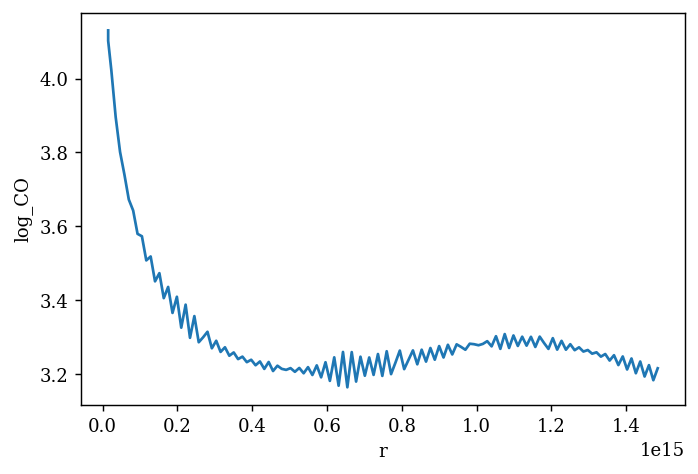

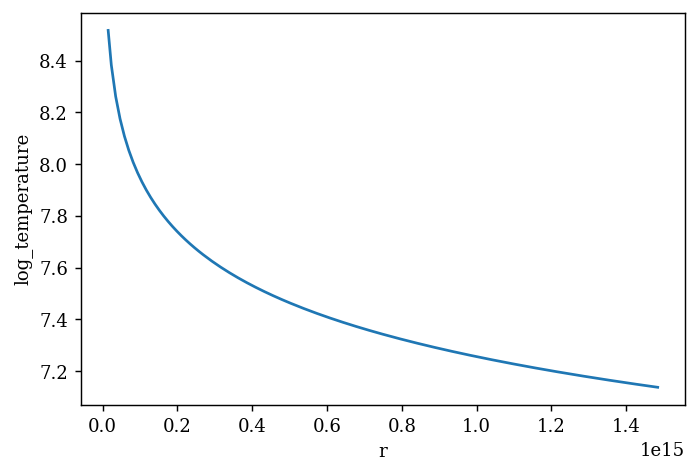

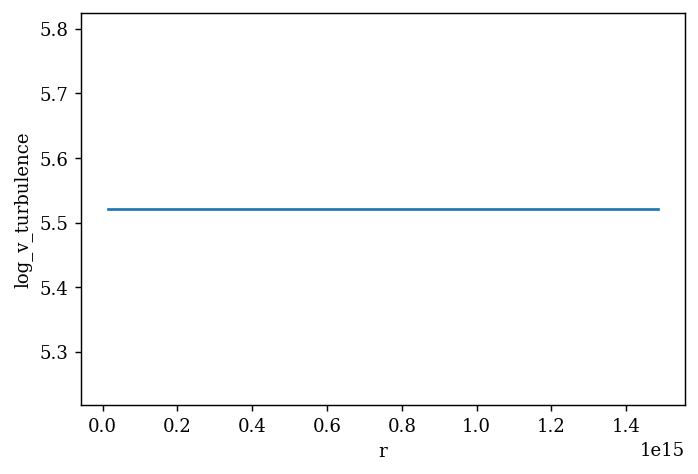

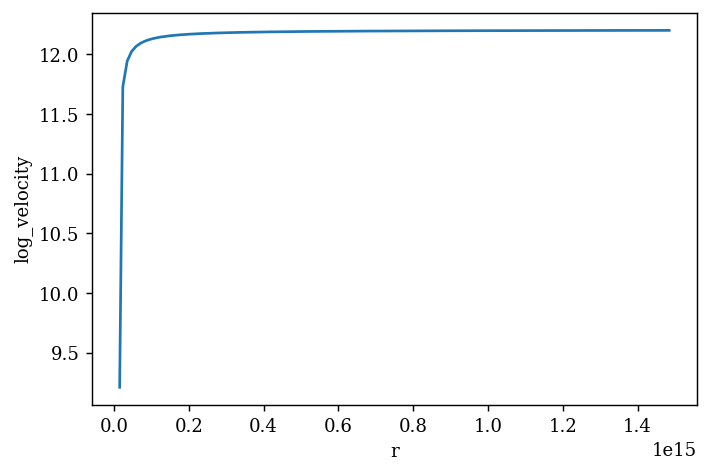

In [20]:
spherical.plot()

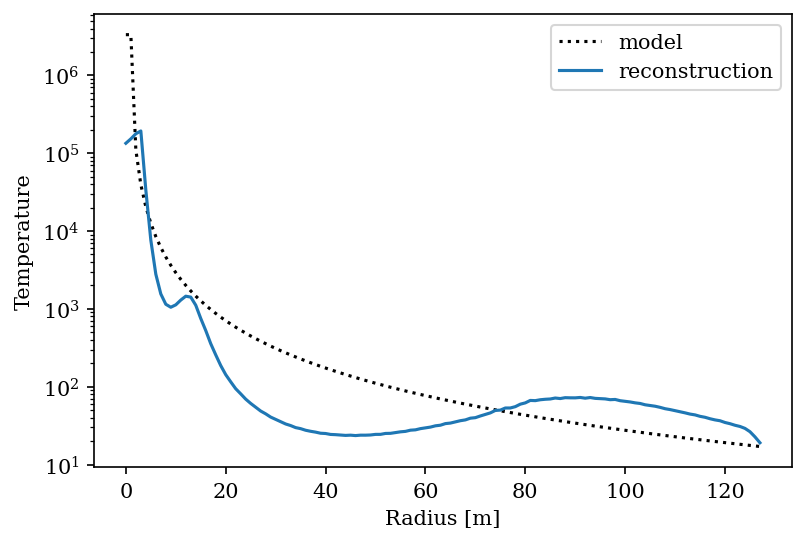

In [36]:
plt.figure(dpi=150)
plt.plot(torch.exp(spherical_model.model_1D['log_CO']).data, c='k', linestyle=':', label='model')
plt.plot(torch.exp(spherical.model_1D['log_CO']).data, label='reconstruction')
plt.yscale('log')
plt.ylabel('Temperature')
plt.xlabel('Radius [m]')
plt.legend()

NameError: name 'temperature' is not defined

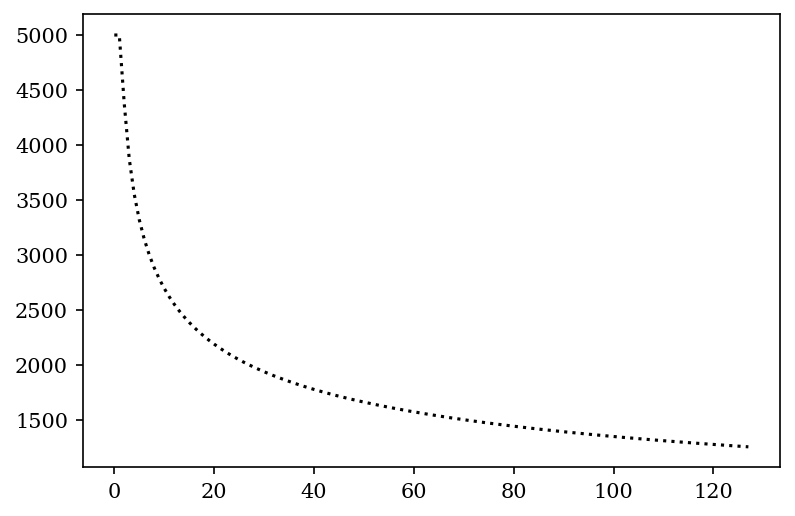

In [14]:
plt.figure(dpi=150)
plt.plot(torch.exp(spherical_model.model_1D['log_temperature']).data, c='k', linestyle=':', label='model')
plt.plot(temperature.data, label='reconstruction')
plt.yscale('log')
plt.ylabel('Temperature')
plt.xlabel('Radius [m]')
plt.legend()

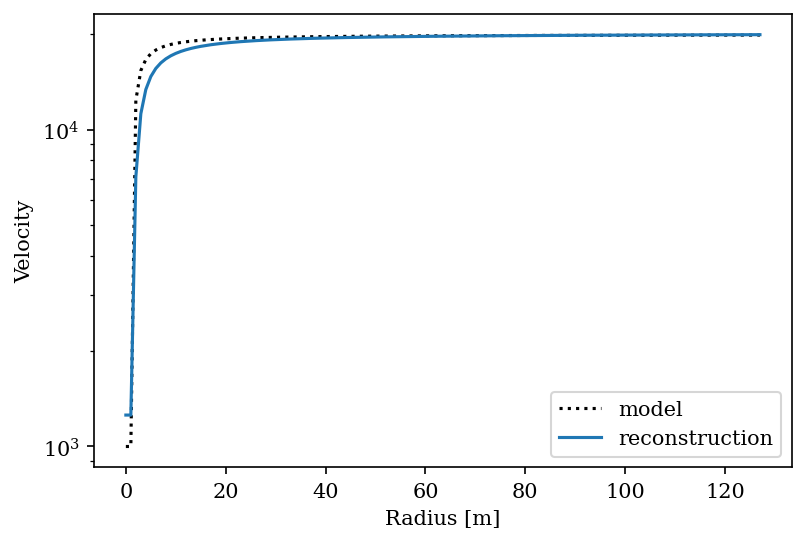

In [ ]:
plt.figure(dpi=150)
plt.plot(v_fac * torch.exp(spherical_model.model_1D['log_velocity']).data, c='k', linestyle=':', label='model')
plt.plot(velocity.data, label='reconstruction')
plt.yscale('log')
plt.ylabel('Velocity')
plt.xlabel('Radius [m]')
plt.legend()

In [37]:
spherical.model_1D.save('models/test_model_all_CO_25_beta_0.9_epsilon_0.85_10_lines.h5')